## Machine learning project - Urban air pollution

In [1]:
# Import libraries for data visualization and data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

RSEED = 42

In [2]:
# Import data
air_pollution = pd.read_csv("data/Train.csv")

In [3]:
# Check data
air_pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

In [4]:
# Check data for nan's
nan_count = air_pollution.isna().sum()
nan_percent = air_pollution.isna().sum()/len(air_pollution)*100

pd.options.display.max_rows = 4000
#print(nan_count)
#print(nan_percent)

In [5]:
# Create two dataframes from data:
# 1) Complete dataframe (contains all numerical features)
# 2) Incomplete dataframe (contains not all numerical features)
feature_set1 = [
'Place_ID X Date', 
'Date', 
'Place_ID',
'target', 
'target_min', 
'target_max', 
'target_variance', 
'target_count']

feature_set2 = [
'Place_ID X Date', 
'Date', 
'Place_ID', 
'target', 
'target_min', 
'target_max', 
'target_variance', 
'target_count', 
'L3_NO2_sensor_altitude', 
'L3_NO2_sensor_azimuth_angle', 
'L3_NO2_sensor_zenith_angle', 
'L3_NO2_solar_azimuth_angle', 
'L3_NO2_solar_zenith_angle', 
'L3_O3_sensor_azimuth_angle', 
'L3_O3_sensor_zenith_angle', 
'L3_O3_solar_azimuth_angle', 
'L3_O3_solar_zenith_angle', 
'L3_CO_sensor_altitude',
'L3_CO_sensor_azimuth_angle',
'L3_CO_sensor_zenith_angle',
'L3_CO_solar_azimuth_angle',
'L3_CO_solar_zenith_angle',
'L3_HCHO_solar_azimuth_angle',
'L3_HCHO_solar_zenith_angle',
'L3_HCHO_sensor_azimuth_angle',
'L3_HCHO_sensor_zenith_angle',
'L3_AER_AI_sensor_altitude',
'L3_AER_AI_sensor_azimuth_angle',
'L3_AER_AI_sensor_zenith_angle',
'L3_AER_AI_solar_azimuth_angle',
'L3_AER_AI_solar_zenith_angle',
'L3_CLOUD_sensor_azimuth_angle',
'L3_CLOUD_sensor_zenith_angle',
'L3_CLOUD_solar_azimuth_angle',
'L3_CLOUD_solar_zenith_angle',
'L3_SO2_sensor_azimuth_angle',
'L3_SO2_sensor_zenith_angle',
'L3_SO2_solar_azimuth_angle',
'L3_SO2_solar_zenith_angle',
'L3_CH4_CH4_column_volume_mixing_ratio_dry_air',
'L3_CH4_aerosol_height',
'L3_CH4_aerosol_optical_depth',
'L3_CH4_sensor_azimuth_angle',
'L3_CH4_sensor_zenith_angle',
'L3_CH4_solar_azimuth_angle',
'L3_CH4_solar_zenith_angle']

complete_df = air_pollution.drop(feature_set1, axis=1)
incomplete_df = air_pollution.drop(feature_set2, axis=1)

In [6]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 74 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   precipitable_water_entire_atmosphere                 30557 non-null  float64
 1   relative_humidity_2m_above_ground                    30557 non-null  float64
 2   specific_humidity_2m_above_ground                    30557 non-null  float64
 3   temperature_2m_above_ground                          30557 non-null  float64
 4   u_component_of_wind_10m_above_ground                 30557 non-null  float64
 5   v_component_of_wind_10m_above_ground                 30557 non-null  float64
 6   L3_NO2_NO2_column_number_density                     28368 non-null  float64
 7   L3_NO2_NO2_slant_column_number_density               28368 non-null  float64
 8   L3_NO2_absorbing_aerosol_index                       28368 non-nul

In [7]:
incomplete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 36 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   precipitable_water_entire_atmosphere                 30557 non-null  float64
 1   relative_humidity_2m_above_ground                    30557 non-null  float64
 2   specific_humidity_2m_above_ground                    30557 non-null  float64
 3   temperature_2m_above_ground                          30557 non-null  float64
 4   u_component_of_wind_10m_above_ground                 30557 non-null  float64
 5   v_component_of_wind_10m_above_ground                 30557 non-null  float64
 6   L3_NO2_NO2_column_number_density                     28368 non-null  float64
 7   L3_NO2_NO2_slant_column_number_density               28368 non-null  float64
 8   L3_NO2_absorbing_aerosol_index                       28368 non-nul

In [8]:
# TODO Decide which features should be analyzed
#feature_set = "complete"
feature_set = "complete"

if feature_set == "complete":
    df = complete_df
if feature_set == "incomplete":
    df = incomplete_df

#df.info()
print("Feature shape:", df.shape)    

Feature shape: (30557, 74)


## Data preprocessing

### Multicollinearity (feature reduction)

In [9]:
# Remove highly correlated features from feature space to avoid multicollinearity
# Highly correlated features defined as: Correlation coefficient > 0.7

# Create correlation matrix
correlation_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Remove features with correlation greater than 0.7
df = df.drop(to_drop, axis=1)

#df.info()
print("Feature shape:", df.shape) 

Feature shape: (30557, 25)


## Data analysis

### Split data in train and test set 

In [10]:
# Define features and target and split data into train and test set
X = df
y = air_pollution["target"]

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RSEED)

# Bug report: train_test_split(stratify=y) does not work! Why?

In [11]:
print(f"Our feature vector has {X.shape[0]} observations and {X.shape[1]} features")
print(f"Our target vector has {y.shape[0]} observations")

Our feature vector has 30557 observations and 25 features
Our target vector has 30557 observations


### Normalization (target)

In [11]:
# Normalize target using MinMaxScaler()
get_target_train = y_train.values.reshape(-1,1)
get_target_test = y_test.values.reshape(-1,1)

scaler = MinMaxScaler()

y_train_fit = scaler.fit(get_target_train)
y_train = pd.DataFrame(y_train_fit.transform(get_target_train))
y_test = pd.DataFrame(y_train_fit.transform(get_target_test))


### Train models

In [13]:
# Create pipeline to impute and scale feature values
num_pipeline = Pipeline([
    ('median_imputer', SimpleImputer(strategy='median')),
    ('minmax_scaler', MinMaxScaler())
])

num_features = X_train.columns

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features)
])

# Create pipeline to start modelling
# Model initiation: Linear regressor
pipe_linreg = Pipeline([
    ('preprocessor', preprocessor),
    ('linreg', LinearRegression())
])

# Model initiation: KNN regressor
pipe_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())
])

# Model initiation: Decision tree
pipe_tree = Pipeline([
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeRegressor())
])

# Model initiation: Random forest
pipe_forest = Pipeline([
    ('preprocessor', preprocessor),
    ('forest', RandomForestRegressor())
])

In [ ]:
# Check: Model performance on train set (without hyperparameter tuning) 
#y_train_pred = cross_val_predict(pipe_linreg, X_train, y_train, cv=5)
#y_train_pred = cross_val_predict(pipe_knn, X_train, y_train, cv=5)
#y_train_pred = cross_val_predict(pipe_tree, X_train, y_train, cv=5)
#y_train_pred = cross_val_predict(pipe_forest, X_train, y_train, cv=5)

rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print("Training")
print("RSME: ", rmse)
print("_"*10)

In [14]:
# Hyperparameter tuning 

# Define hyperparameter search space for GridSearch
param_knn = {'knn__n_neighbors': [5, 7, 9, 11, 13],
             'knn__weights': ['uniform', 'distance'],
             'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  
            }

param_tree = {'tree__max_depth': [10, 50, 100],
              'tree__min_samples_leaf': np.arange(5,55,10),
              'tree__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
              }

param_forest = {'forest__n_estimators': np.arange(50,200,50),
                'forest__max_depth': [5, 10, 15, 50],
                'forest__min_samples_leaf': [50, 100, 150],
                'forest__max_features': ['sqrt']
                }

# Use GridSearch
grid_knn = GridSearchCV(pipe_knn, param_grid=param_knn, cv=5, scoring='neg_root_mean_squared_error', 
                           verbose=5, n_jobs=-1)

grid_tree = GridSearchCV(pipe_tree, param_grid=param_tree, cv=5, scoring='neg_root_mean_squared_error', 
                           verbose=5, n_jobs=-1)

grid_forest = GridSearchCV(pipe_forest, param_grid=param_forest, cv=5, scoring='neg_root_mean_squared_error', 
                           verbose=5, n_jobs=-1)

### Model: Linear regressor

In [15]:
# TODO Bug report: Linear regressor
grid_linreg.fit(X_train,y_train)
y_test_pred = grid_linreg.predict(X_test)

rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print("Testing")
print("RSME: ", rmse)
print("_"*10)

#grid_linreg.fit(X_train,y_train)
#best_estimator_linreg = grid_linreg.best_estimator_
#print("Best parameters: ", grid_linreg.best_params_)
#print("RMSE: ", abs(grid_linreg.best_score_)) 

NameError: name 'grid_linreg' is not defined

### Model: KNN regressor

In [16]:
# KNN regressor
grid_knn.fit(X_train,y_train)
best_estimator_knn = grid_knn.best_estimator_
print("Best parameters: ", grid_knn.best_params_)
print("KNN - RMSE: ", abs(grid_knn.best_score_)) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 3/5] END knn__algorithm=auto, knn__n_neighbors=5, knn__weights=uniform;, score=-0.046 total time=   0.5s
[CV 4/5] END knn__algorithm=auto, knn__n_neighbors=5, knn__weights=uniform;, score=-0.047 total time=   0.5s
[CV 2/5] END knn__algorithm=auto, knn__n_neighbors=5, knn__weights=uniform;, score=-0.046 total time=   0.5s
[CV 3/5] END knn__algorithm=auto, knn__n_neighbors=5, knn__weights=distance;, score=-0.046 total time=   0.5s
[CV 1/5] END knn__algorithm=auto, knn__n_neighbors=5, knn__weights=distance;, score=-0.050 total time=   0.5s
[CV 5/5] END knn__algorithm=auto, knn__n_neighbors=5, knn__weights=uniform;, score=-0.049 total time=   0.5s
[CV 1/5] END knn__algorithm=auto, knn__n_neighbors=5, knn__weights=uniform;, score=-0.050 total time=   0.6s
[CV 2/5] END knn__algorithm=auto, knn__n_neighbors=5, knn__weights=distance;, score=-0.045 total time=   0.6s
[CV 4/5] END knn__algorithm=auto, knn__n_neighbors=5, knn__weig

### Model: Decision tree

In [17]:
# Decision tree regressor
grid_tree.fit(X_train,y_train)
best_estimator_tree = grid_tree.best_estimator_
print("Best parameters: ", grid_tree.best_params_)
print("Tree - RMSE: ", abs(grid_tree.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END tree__criterion=squared_error, tree__max_depth=10, tree__min_samples_leaf=5;, score=-0.051 total time=   0.4s
[CV 2/5] END tree__criterion=squared_error, tree__max_depth=10, tree__min_samples_leaf=15;, score=-0.044 total time=   0.4s
[CV 2/5] END tree__criterion=squared_error, tree__max_depth=10, tree__min_samples_leaf=5;, score=-0.045 total time=   0.5s
[CV 5/5] END tree__criterion=squared_error, tree__max_depth=10, tree__min_samples_leaf=5;, score=-0.050 total time=   0.5s
[CV 1/5] END tree__criterion=squared_error, tree__max_depth=10, tree__min_samples_leaf=15;, score=-0.050 total time=   0.5s
[CV 3/5] END tree__criterion=squared_error, tree__max_depth=10, tree__min_samples_leaf=15;, score=-0.044 total time=   0.5s
[CV 3/5] END tree__criterion=squared_error, tree__max_depth=10, tree__min_samples_leaf=5;, score=-0.046 total time=   0.6s
[CV 4/5] END tree__criterion=squared_error, tree__max_depth=10, tree__min_

### Model: Random forest

In [18]:
# Random forest regressor
grid_forest.fit(X_train,y_train)
best_estimator_forest = grid_forest.best_estimator_
print("Best parameters: ", grid_forest.best_params_)
print("Forest - RMSE: ", abs(grid_forest.best_score_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/skl

[CV 1/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=50;, score=-0.050 total time=   1.3s
[CV 5/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=50;, score=-0.050 total time=   1.4s
[CV 2/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=50;, score=-0.045 total time=   1.4s
[CV 4/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=50;, score=-0.047 total time=   1.4s
[CV 3/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=50;, score=-0.046 total time=   1.4s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/skl

[CV 2/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=100;, score=-0.045 total time=   2.7s
[CV 1/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=100;, score=-0.050 total time=   2.8s
[CV 3/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=100;, score=-0.046 total time=   2.9s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 4/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=100;, score=-0.047 total time=   3.0s
[CV 5/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=100;, score=-0.050 total time=   3.0s
[CV 1/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=50;, score=-0.050 total time=   1.5s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 3/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=150;, score=-0.046 total time=   4.3s
[CV 1/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=150;, score=-0.050 total time=   4.4s
[CV 2/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=50;, score=-0.045 total time=   1.5s
[CV 2/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=150;, score=-0.045 total time=   4.4s
[CV 3/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=50;, score=-0.046 total time=   1.5s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/skl

[CV 4/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=50;, score=-0.047 total time=   1.5s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 4/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=150;, score=-0.047 total time=   4.4s
[CV 5/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=50;, score=-0.050 total time=   1.5s
[CV 5/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=150;, score=-0.050 total time=   4.4s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 1/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=100;, score=-0.050 total time=   2.9s
[CV 5/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=100;, score=-0.050 total time=   2.8s
[CV 2/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=100;, score=-0.045 total time=   3.0s
[CV 4/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=100;, score=-0.047 total time=   2.9s
[CV 3/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=100;, score=-0.046 total time=   3.0s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/skl

[CV 2/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=50;, score=-0.045 total time=   1.5s
[CV 1/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=50;, score=-0.051 total time=   1.6s
[CV 3/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=50;, score=-0.046 total time=   1.5s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 2/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=150;, score=-0.045 total time=   4.4s
[CV 1/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=150;, score=-0.050 total time=   4.5s
[CV 3/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=150;, score=-0.046 total time=   4.6s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 4/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=50;, score=-0.047 total time=   1.5s
[CV 5/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=50;, score=-0.050 total time=   1.5s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 5/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=150;, score=-0.050 total time=   4.4s
[CV 4/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=150;, score=-0.047 total time=   4.4s
[CV 1/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=100;, score=-0.050 total time=   2.9s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 2/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=100;, score=-0.045 total time=   2.9s
[CV 3/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=100;, score=-0.046 total time=   2.9s
[CV 4/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=100;, score=-0.047 total time=   2.9s
[CV 5/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=100;, score=-0.050 total time=   2.9s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/skl

[CV 1/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=150;, score=-0.050 total time=   4.4s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 1/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=50;, score=-0.047 total time=   2.3s
[CV 3/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=50;, score=-0.043 total time=   2.3s
[CV 2/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=50;, score=-0.042 total time=   2.4s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 2/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=150;, score=-0.045 total time=   4.3s
[CV 3/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=150;, score=-0.046 total time=   4.4s
[CV 4/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=150;, score=-0.047 total time=   4.3s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 4/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=50;, score=-0.043 total time=   2.3s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 5/5] END forest__max_depth=5, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=150;, score=-0.050 total time=   4.4s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 5/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=50;, score=-0.047 total time=   2.4s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 1/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=100;, score=-0.047 total time=   4.5s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 2/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=100;, score=-0.042 total time=   4.7s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 3/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=100;, score=-0.042 total time=   4.6s
[CV 5/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=100;, score=-0.047 total time=   4.5s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 4/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=100;, score=-0.043 total time=   4.8s
[CV 1/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=50;, score=-0.048 total time=   2.1s
[CV 2/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=50;, score=-0.043 total time=   2.2s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 3/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=50;, score=-0.044 total time=   2.1s
[CV 1/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=150;, score=-0.047 total time=   6.9s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 2/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=150;, score=-0.042 total time=   6.9s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 3/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=150;, score=-0.042 total time=   6.8s
[CV 4/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=50;, score=-0.044 total time=   2.1s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 5/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=50;, score=-0.048 total time=   2.1s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 4/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=150;, score=-0.043 total time=   6.8s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 1/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=100;, score=-0.048 total time=   4.2s
[CV 5/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=150;, score=-0.047 total time=   7.0s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 2/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=100;, score=-0.043 total time=   4.3s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 3/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=100;, score=-0.043 total time=   4.4s
[CV 4/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=100;, score=-0.044 total time=   4.2s
[CV 5/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=100;, score=-0.047 total time=   4.2s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 1/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=50;, score=-0.049 total time=   2.1s
[CV 2/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=50;, score=-0.043 total time=   2.0s
[CV 3/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=50;, score=-0.044 total time=   2.0s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 1/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=150;, score=-0.048 total time=   6.3s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 5/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=50;, score=-0.048 total time=   2.0s
[CV 4/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=50;, score=-0.045 total time=   2.1s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 2/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=150;, score=-0.043 total time=   6.2s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 3/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=150;, score=-0.043 total time=   6.3s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 4/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=150;, score=-0.044 total time=   6.6s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 5/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=150;, score=-0.047 total time=   6.2s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 1/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=100;, score=-0.049 total time=   3.8s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 2/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=100;, score=-0.043 total time=   3.9s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 3/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=100;, score=-0.044 total time=   4.0s
[CV 4/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=100;, score=-0.045 total time=   4.0s
[CV 5/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=100;, score=-0.048 total time=   3.9s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 1/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=50;, score=-0.047 total time=   2.5s
[CV 1/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=150;, score=-0.049 total time=   6.0s
[CV 3/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=50;, score=-0.042 total time=   2.5s
[CV 2/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=50;, score=-0.041 total time=   2.6s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/skl

[CV 2/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=150;, score=-0.043 total time=   6.0s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 3/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=150;, score=-0.044 total time=   5.9s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 4/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=150;, score=-0.045 total time=   5.9s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 5/5] END forest__max_depth=10, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=150;, score=-0.048 total time=   5.9s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 4/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=50;, score=-0.042 total time=   2.6s
[CV 5/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=50;, score=-0.046 total time=   2.6s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 2/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=100;, score=-0.041 total time=   5.0s
[CV 1/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=100;, score=-0.047 total time=   5.2s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 3/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=100;, score=-0.042 total time=   5.0s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 4/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=100;, score=-0.043 total time=   5.0s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 5/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=100;, score=-0.046 total time=   5.0s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 1/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=50;, score=-0.048 total time=   2.4s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 2/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=50;, score=-0.043 total time=   2.3s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 3/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=50;, score=-0.043 total time=   2.2s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 1/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=150;, score=-0.047 total time=   7.7s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 4/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=50;, score=-0.044 total time=   2.3s
[CV 3/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=150;, score=-0.042 total time=   7.6s
[CV 2/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=150;, score=-0.041 total time=   7.6s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 5/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=50;, score=-0.047 total time=   2.3s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 4/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=150;, score=-0.042 total time=   7.6s
[CV 5/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=150;, score=-0.046 total time=   7.5s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 1/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=100;, score=-0.048 total time=   4.6s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 2/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=100;, score=-0.042 total time=   4.4s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 5/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=100;, score=-0.047 total time=   4.4s
[CV 3/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=100;, score=-0.043 total time=   4.6s
[CV 4/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=100;, score=-0.044 total time=   4.5s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 3/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=50;, score=-0.044 total time=   2.1s
[CV 1/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=50;, score=-0.049 total time=   2.2s
[CV 2/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=50;, score=-0.043 total time=   2.1s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 1/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=150;, score=-0.048 total time=   6.8s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 5/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=50;, score=-0.048 total time=   2.1s
[CV 4/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=50;, score=-0.045 total time=   2.1s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 3/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=150;, score=-0.043 total time=   6.8s
[CV 2/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=150;, score=-0.042 total time=   6.8s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 4/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=150;, score=-0.044 total time=   6.8s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 5/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=150;, score=-0.047 total time=   6.9s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 1/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=100;, score=-0.049 total time=   4.1s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 2/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=100;, score=-0.043 total time=   4.2s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 3/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=100;, score=-0.044 total time=   4.2s
[CV 4/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=100;, score=-0.045 total time=   4.1s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 5/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=100;, score=-0.048 total time=   4.1s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 2/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=50;, score=-0.041 total time=   2.6s
[CV 1/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=150;, score=-0.049 total time=   6.2s
[CV 1/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=50;, score=-0.047 total time=   2.7s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 3/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=50;, score=-0.042 total time=   2.6s
[CV 2/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=150;, score=-0.043 total time=   6.4s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 3/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=150;, score=-0.044 total time=   6.1s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 4/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=150;, score=-0.045 total time=   6.2s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 5/5] END forest__max_depth=15, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=150;, score=-0.048 total time=   6.2s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 4/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=50;, score=-0.043 total time=   2.6s
[CV 5/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=50;, score=-0.046 total time=   2.7s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 1/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=100;, score=-0.047 total time=   5.4s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 3/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=100;, score=-0.042 total time=   5.2s
[CV 2/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=100;, score=-0.041 total time=   5.2s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 4/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=100;, score=-0.042 total time=   5.3s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 5/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=100;, score=-0.046 total time=   5.2s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 1/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=50;, score=-0.048 total time=   2.4s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 2/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=50;, score=-0.042 total time=   2.4s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 3/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=50;, score=-0.043 total time=   2.4s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 1/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=150;, score=-0.047 total time=   8.0s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 4/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=50;, score=-0.044 total time=   2.4s
[CV 2/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=150;, score=-0.041 total time=   8.1s
[CV 3/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=150;, score=-0.042 total time=   8.0s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 5/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=50;, score=-0.047 total time=   2.4s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 4/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=150;, score=-0.042 total time=   7.9s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 5/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=50, forest__n_estimators=150;, score=-0.046 total time=   7.8s
[CV 1/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=100;, score=-0.048 total time=   4.7s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 2/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=100;, score=-0.042 total time=   4.7s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 5/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=100;, score=-0.047 total time=   4.7s
[CV 3/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=100;, score=-0.043 total time=   4.8s
[CV 4/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=100;, score=-0.044 total time=   4.7s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 3/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=50;, score=-0.044 total time=   2.2s
[CV 1/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=50;, score=-0.049 total time=   2.2s
[CV 2/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=50;, score=-0.043 total time=   2.2s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 1/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=150;, score=-0.048 total time=   7.0s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 4/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=50;, score=-0.045 total time=   2.2s
[CV 5/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=50;, score=-0.048 total time=   2.2s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 2/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=150;, score=-0.042 total time=   6.9s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 3/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=150;, score=-0.043 total time=   7.0s
[CV 4/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=150;, score=-0.044 total time=   7.1s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 5/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=100, forest__n_estimators=150;, score=-0.047 total time=   7.0s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 1/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=100;, score=-0.049 total time=   4.3s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 2/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=100;, score=-0.043 total time=   4.4s


/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV 3/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=100;, score=-0.044 total time=   4.3s
[CV 4/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=100;, score=-0.045 total time=   4.3s
[CV 5/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=100;, score=-0.048 total time=   4.2s
[CV 1/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=150;, score=-0.049 total time=   6.1s
[CV 2/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=150;, score=-0.043 total time=   6.0s
[CV 3/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=150, forest__n_estimators=150;, score=-0.044 total time=   5.7s
[CV 4/5] END forest__max_depth=50, forest__max_features=sqrt, forest__min_samples_leaf=150, fo

/Users/julia/neuefische/ml-project/.venv/lib/python3.11/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Best parameters:  {'forest__max_depth': 50, 'forest__max_features': 'sqrt', 'forest__min_samples_leaf': 50, 'forest__n_estimators': 150}
Forest - RMSE:  0.043456701585558664


### Test models

In [19]:
# KNN regressor
knn_pred = best_estimator_knn.predict(X_test)
print("KNN - RMSE: {:.3f}".format(mean_squared_error(y_test, knn_pred, squared=False)))

KNN - RMSE: 0.045


In [20]:
# Decision tree regressor
tree_pred = best_estimator_tree.predict(X_test)
print("Tree - RMSE: {:.3f}".format(mean_squared_error(y_test, tree_pred, squared=False)))

Tree - RMSE: 0.045


In [21]:
# Random forest regressor
forest_pred = best_estimator_forest.predict(X_test)
print("Forest - RMSE: {:.3f}".format(mean_squared_error(y_test, forest_pred, squared=False)))


Forest - RMSE: 0.043


Ensemble Methods: XGBOOST and Adaboost

In [14]:
# Import Regressor
from xgboost import XGBRegressor

# Model initiation: XGBOOST_tree
pipe_xgboost_tree = Pipeline([
    ('preprocessor', preprocessor),
    ('xgboost_tree', XGBRegressor())
])

In [22]:
# Define hyperparameter search space for GridSearch
param_xgboost_tree = {'xgboost_tree__eta': [0.1, 0.15, 0.2, 0.25, 0.3, 0.4],
                      'xgboost_tree__max_depth': [2, 3, 4, 5, 6],
                      'xgboost_tree__lambda': [0.2,0.4, 0.6, 0.8, 1.0],
                      'xgboost_tree__alpha': [0.2,0.4, 0.6, 0.8, 1.0],  
                      }

# Use GridSearch
grid_xgboost_tree = GridSearchCV(pipe_xgboost_tree, param_grid=param_xgboost_tree, cv=5, scoring='neg_root_mean_squared_error', 
                           verbose=5)

In [23]:
# XGboost regressor tree based
grid_xgboost_tree.fit(X_train,y_train.values.ravel())
best_estimator_xgboost_tree = grid_xgboost_tree.best_estimator_
print("Best parameters: ", grid_xgboost_tree.best_params_)
print("XGBoost_tree - RMSE: ", abs(grid_xgboost_tree.best_score_))

Fitting 5 folds for each of 750 candidates, totalling 3750 fits
[CV 1/5] END xgboost_tree__alpha=0.2, xgboost_tree__eta=0.1, xgboost_tree__lambda=0.2, xgboost_tree__max_depth=2;, score=-0.048 total time=   0.5s
[CV 2/5] END xgboost_tree__alpha=0.2, xgboost_tree__eta=0.1, xgboost_tree__lambda=0.2, xgboost_tree__max_depth=2;, score=-0.042 total time=   0.5s
[CV 3/5] END xgboost_tree__alpha=0.2, xgboost_tree__eta=0.1, xgboost_tree__lambda=0.2, xgboost_tree__max_depth=2;, score=-0.043 total time=   0.5s
[CV 4/5] END xgboost_tree__alpha=0.2, xgboost_tree__eta=0.1, xgboost_tree__lambda=0.2, xgboost_tree__max_depth=2;, score=-0.044 total time=   0.5s
[CV 5/5] END xgboost_tree__alpha=0.2, xgboost_tree__eta=0.1, xgboost_tree__lambda=0.2, xgboost_tree__max_depth=2;, score=-0.047 total time=   0.5s
[CV 1/5] END xgboost_tree__alpha=0.2, xgboost_tree__eta=0.1, xgboost_tree__lambda=0.2, xgboost_tree__max_depth=3;, score=-0.046 total time=   0.7s
[CV 2/5] END xgboost_tree__alpha=0.2, xgboost_tree__et

In [ ]:
# Decision XGboost_tree regressor
xgboost_tree_pred = best_estimator_xgboost_tree.predict(X_test)
print("XGboost_tree - RMSE: {:.3f}".format(mean_squared_error(y_test, xgboost_tree_pred, squared=False)))

XGboost_tree - RMSE: 0.038


In [27]:
xgb_reg = XGBRegressor(alpha=0.4, eta=0.25, max_depth=6)
xgb_reg.fit(X_train, y_train)

y_pred_best_train = xgb_reg.predict(X_train)
y_pred_best = xgb_reg.predict(X_test)

In [30]:
rmse_best = mean_squared_error(y_test,y_pred_best)
print("RMSE", rmse_best)

RMSE 0.0014033116999541578


In [36]:
feat_importances = pd.Series(xgb_reg.feature_importances_, index=X.columns)
print(feat_importances.sort_values(ascending=False))

L3_CO_CO_column_number_density                         0.180504
L3_HCHO_HCHO_slant_column_number_density               0.087006
L3_AER_AI_sensor_altitude                              0.079354
L3_NO2_NO2_column_number_density                       0.073699
L3_HCHO_tropospheric_HCHO_column_number_density_amf    0.050241
u_component_of_wind_10m_above_ground                   0.048331
precipitable_water_entire_atmosphere                   0.043332
L3_NO2_absorbing_aerosol_index                         0.042759
v_component_of_wind_10m_above_ground                   0.035492
L3_CLOUD_cloud_optical_depth                           0.034239
L3_NO2_sensor_altitude                                 0.033554
relative_humidity_2m_above_ground                      0.033464
L3_CLOUD_surface_albedo                                0.028944
L3_CH4_CH4_column_volume_mixing_ratio_dry_air          0.028330
L3_CH4_aerosol_optical_depth                           0.026783
L3_CLOUD_cloud_base_height              

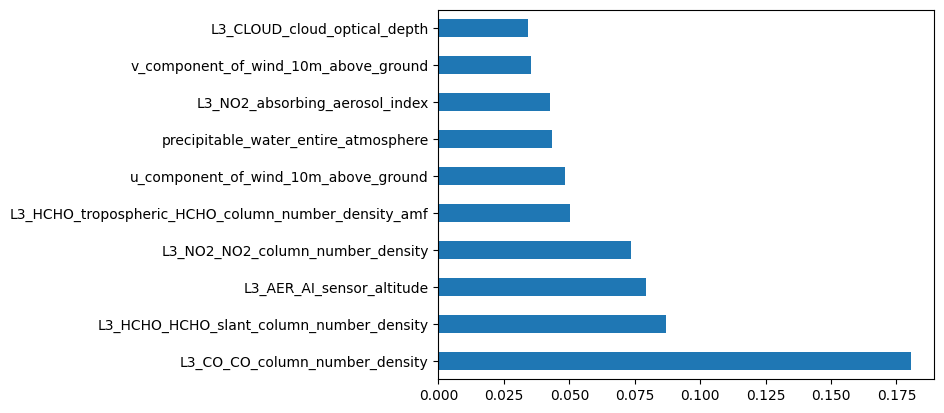

In [39]:
feat_importances.nlargest(10).plot(kind='barh')
plt.savefig('feature_importance.png')
plt.show()

## Appendix

### Baseline model

In [ ]:
# Impute features, where values is missing with median values
X_train_tmp = X_train.copy()
X_test_tmp = X_test.copy()

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
X_train_imputed = pd.DataFrame(imp_median.fit_transform(X_train_tmp))
X_train_imputed.columns = X_train_tmp.columns
X_train_imputed.index = X_train_tmp.index

X_test_imputed = pd.DataFrame(imp_median.fit_transform(X_test_tmp))
X_test_imputed.columns = X_test_tmp.columns
X_test_imputed.index = X_test_tmp.index

In [ ]:
# Normalize features using MinMaxScaler()
scaler = MinMaxScaler()

columns = X_train_imputed.columns
X_train_imputed[columns] = scaler.fit_transform(X_train_imputed[columns])
X_test_imputed[columns] = scaler.fit_transform(X_test_imputed[columns])

In [ ]:
# Choose baseline model 
# TODO Compute linear models with one feature to identify best feature (lowest RMSE)
n_features = X_train_imputed.columns

all_rmses = []

for feature in n_features:
    
    X_train_baseline = X_train_imputed[[feature]]
    X_test_baseline = X_test_imputed[[feature]]

    # Linear regression model
    linear_mdl = LinearRegression()
    linear_mdl.fit(X_train_baseline,y_train)

    y_pred_train = linear_mdl.predict(X_train_baseline)
    y_pred = linear_mdl.predict(X_test_baseline)

    rmse = mean_squared_error(y_test, y_pred, squared=False)

    #all_features.append(feature)
    all_rmses.append([feature, rmse])

all_rmses = pd.DataFrame(all_rmses).sort_values(by=1, ascending=True)
print(all_rmses)

In [ ]:
# Compute baseline model
#baseline_feature = "L3_HCHO_tropospheric_HCHO_column_number_density"
baseline_feature = "u_component_of_wind_10m_above_ground"

X_train_baseline = X_train_imputed[[baseline_feature]]
X_test_baseline = X_test_imputed[[baseline_feature]]

# Linear regression model
linear_mdl = LinearRegression()
linear_mdl.fit(X_train_baseline,y_train)

y_pred_train = linear_mdl.predict(X_train_baseline)
y_pred = linear_mdl.predict(X_test_baseline)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Linear regression - Baseline model")
print("RSME: ", rmse)
print("_"*10)

In [ ]:
# Plot baseline model
sns.set_style("ticks")
plt.rcParams["figure.figsize"] = (7,4)

plt.scatter(X_train_baseline, y_train, color='grey', alpha=0.25)
plt.plot(X_train_baseline, y_pred_train, '-', color='black', linewidth=2)
plt.title("Air pollution (baseline model)")
plt.ylabel('PM2.5 (µg/m^3)')
#plt.xlabel('L3 HCHO tropospheric HCHO column number density (mol/m^2)');
plt.xlabel(baseline_feature);